In [1]:
# -*- coding: utf-8 -*-
#  Copyright 2021 - 2022 United Kingdom Research and Innovation
#  Copyright 2021 - 2022 The University of Manchester
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Gemma Fardell (UKRI-STFC)
#                   Edoardo Pasca (UKRI-STFC)
#                   Laura Murgatroyd (UKRI-STFC)

# A detailed look at CIL geometry
CIL holds your CT data in specialised data-containers, `AcquisitionData` and `ImageData`.

Each of these has an associated `geometry` which contains the meta-data describing your set-up.

 - `AcquisitionGeometry` describes the acquisition data and parameters

 - `ImageGeometry` describes the image data (i.e., the reconstruction volume)

The data-readers provided by CIL (Nikon, Zeiss and diamond nexus readers) will read in your data and return you a fully configured acquisition data with the acquisition geometry already configured, however if you read in a stack of tiffs or want to tweak the parameters this is simple to create by hand.

## The structure of an AcquisitionGeometry

An instance of an `AcquisitionGeometry`, `ag`, holds the configuration of the system, in `config` which is subdivided in to:
 - `ag.config.system` -  The position and orientations of the `source`/`ray`, `rotation_axis` and `detector`
 - `ag.config.panel` - The number of pixels, the size of pixels, and the position of pixel 0
 - `ag.config.angles` - The number of angles, the unit of the angles (default is degrees)
 - `ag.config.channels` - The number of channels

## Create a simple AcquisitionGeometry

You can use the `AcquisitionGeometry` methods to describe circular trajectory parallel-beam or cone-beam 2D or 3D data.

 - `ag = AcquisitionGeometry.create_Parallel2D()`
 - `ag = AcquisitionGeometry.create_Parallel3D()`
 - `ag = AcquisitionGeometry.create_Cone2D(source_position, detector_position)`
 - `ag = AcquisitionGeometry.create_Cone3D(source_position, detector_position)`

This notebook will step though each in turn and show you how to describe both simple and complex geometries with offsets and rotations.

No matter which type of geometry you create you will also need to describe the panel and projection angles.
 - `ag.set_panel(num_pixels, pixel_size)`
 - `ag.set_angles(angles, angle_unit)`

For multi-channel data you need to add the number of channels.
 - `ag.set_channels(num_channels)`

And you will also need to describe the order your data is stored in using the relavent labels from the CIL default labels: `channel`, `angle`, `vertical` and `horizontal`
 - `ag.set_labels(['angle','vertical','horizontal'])`

### A Note on CIL AcquisitionGeometry:
 - The geometry is described by a right-handed cooridinate system
 - Positive angles describe the object rotating anti-clockwise when viewed from above





### Parallel geometry

Parallel beams of X-rays are emitted onto 1D (single pixel row) or 2D detector array. This geometry is common for synchrotron sources.

We describe the system, and then set the panel and angle data. Note that for 3D geometry we need to describe a 2D panel where `num_pixels=[X,Y]`

```python
parallel_2D_geometry = AcquisitionGeometry.create_Parallel2D()\
    
                                          .set_panel(num_pixels=10)\
        
                                          .set_angles(angles=range(0,180))


parallel_3D_geometry = AcquisitionGeometry.create_Parallel3D()\
    
                                          .set_panel(num_pixels=[10,10])\
        
                                          .set_angles(angles=range(0,180))
```
Both 2D and 3D parallel-beam geometries are displayed below. Note that the detector position has been set, this is not necessary to describe and reconstruct the data, but it makes the displayed images clearer.

`show_geometry()` can be used to display the configured geometry and will be used here extensively. You can also print the geometry to obtain a detailed description. If `show_geometry` is not passed an `ImageGeometry` it will show the default geometry associated with the `AcquisitionGeometry` 


An example creating a 2D parallel-beam geometry:

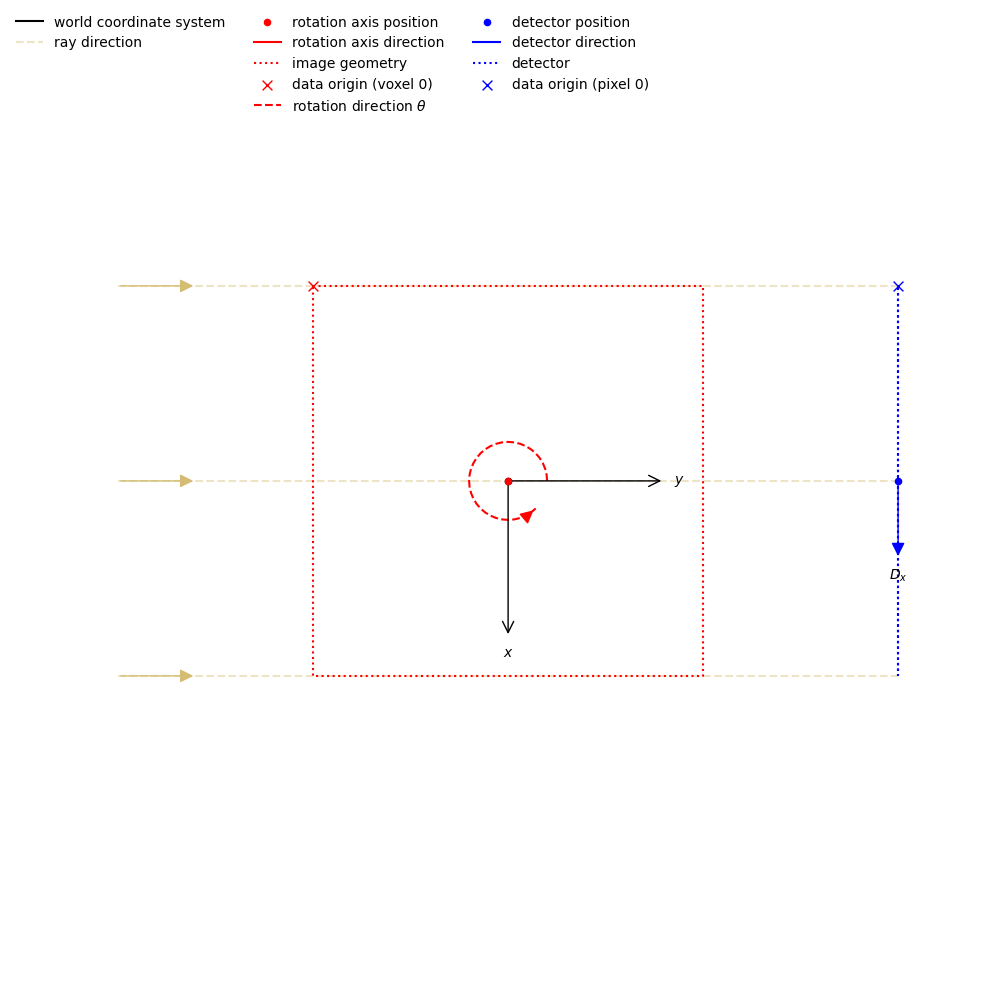

2D Parallel-beam tomography
System configuration:
	Ray direction: [0., 1.]
	Rotation axis position: [0., 0.]
	Detector position: [ 0., 10.]
	Detector direction x: [1., 0.]
Panel configuration:
	Number of pixels: [10  1]
	Pixel size: [1. 1.]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 180
	Angles 0-9 in degrees: [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]
	Angles 170-179 in degrees: [170., 171., 172., 173., 174., 175., 176., 177., 178., 179.]
	Full angular array can be accessed with acquisition_data.geometry.angles
Distances in units: units distance


In [2]:
from cil.framework import AcquisitionGeometry
from cil.utilities.display import show_geometry

ag = AcquisitionGeometry.create_Parallel2D(detector_position=[0,10])\
    .set_panel(num_pixels=10)\
    .set_angles(angles=range(0,180))

show_geometry(ag)

print(ag)

An example creating a 3D parallel-beam geometry:

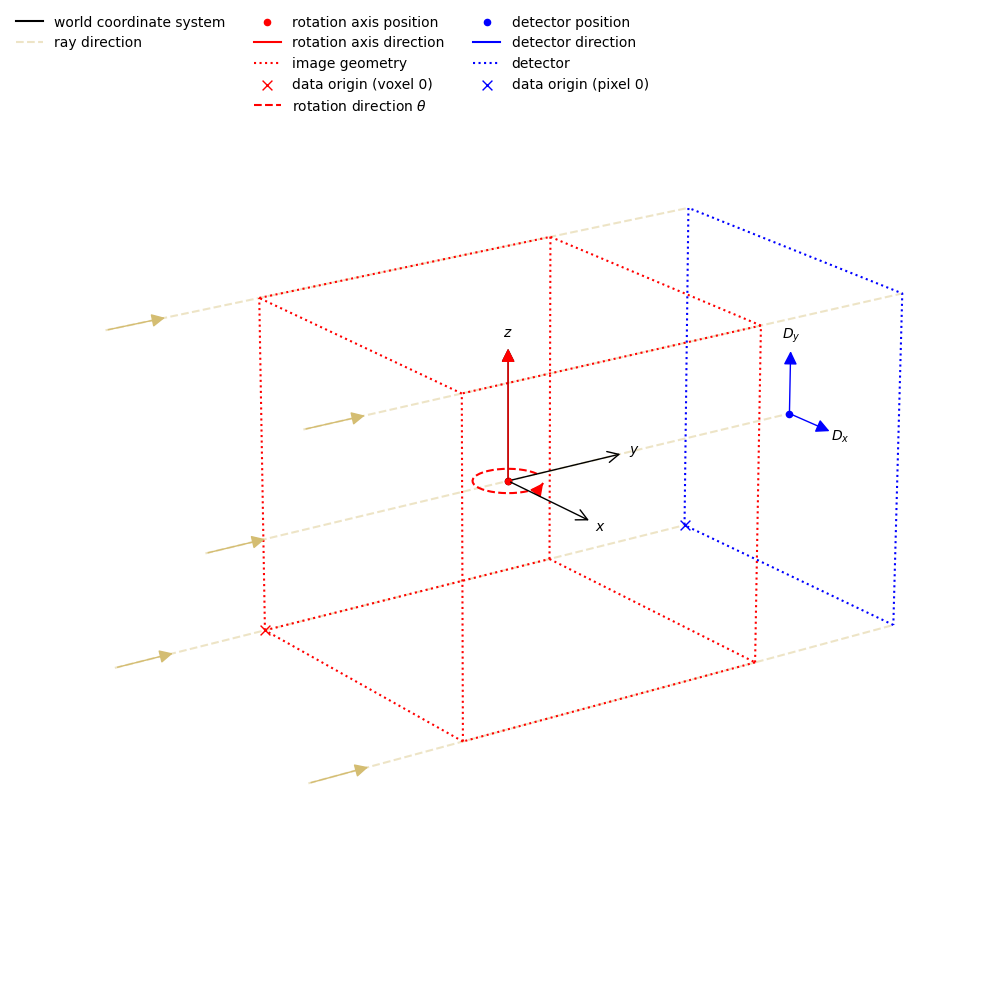

In [3]:
ag = AcquisitionGeometry.create_Parallel3D(detector_position=[0,10,0])\
    .set_panel(num_pixels=[10,10])\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

### Fan-beam geometry

A single point-like X-ray source emits a cone-beam onto a single row of detector pixels. The beam is typically collimated to imaging field of view. Collimation greatly reduce amount of scatter radiation reaching the detector. Fan-beam geometry is used when scattering has significant influence on image quality or single-slice reconstruction is sufficient.

We describe the system, and then set the panel and angle data.

For fan-beam data the source and detector positions are required. As default we place them along the Y-axis where the rotation-axis is on the origin. They are specified as `[x,y]` coordinates.

```python
cone_2D_geometry = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10])\
    
                                      .set_panel(num_pixels=10)\
        
                                      .set_angles(angles=range(0,180))
```

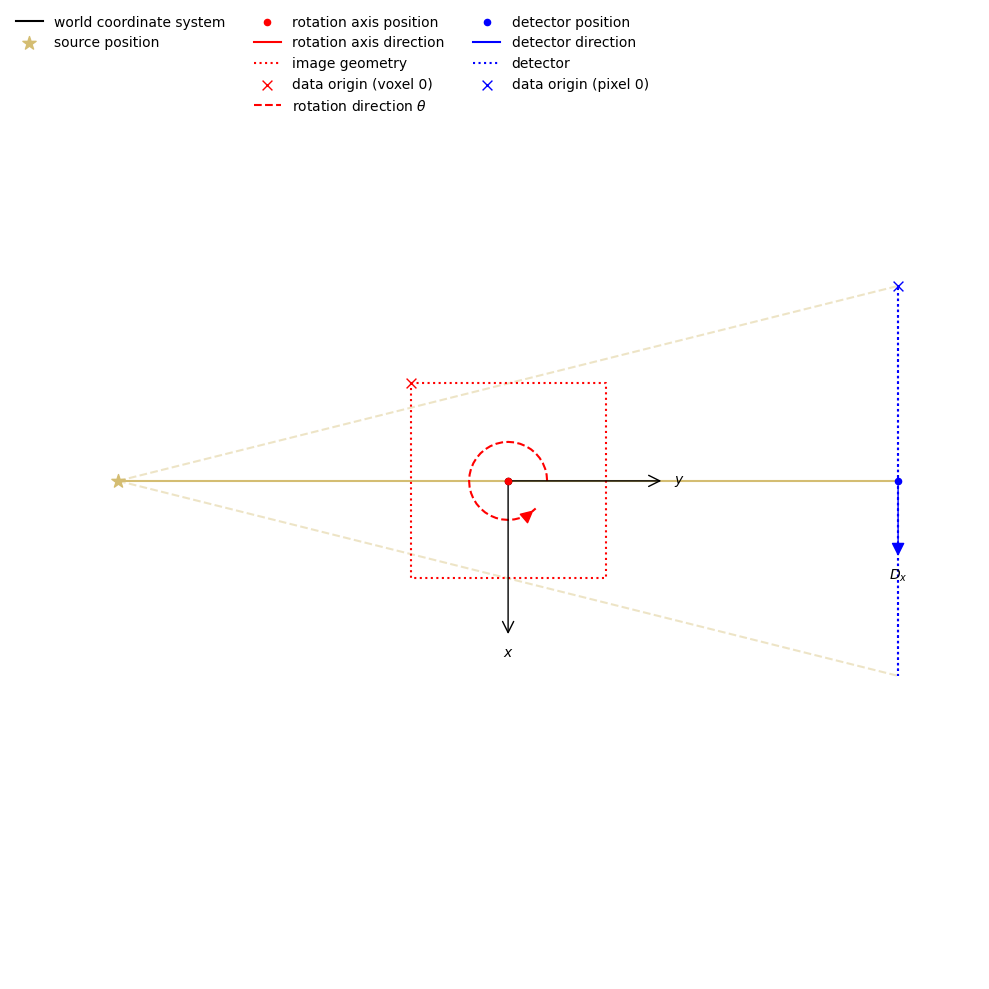

In [4]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10])\
    .set_panel(num_pixels=10)\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

### Cone-beam geometry

A single point-like X-ray source emits a cone-beam onto 2D detector array. Cone-beam geometry is mainly used in lab-based CT instruments.

We describe the system, and then set the panel and angle data.

For cone-beam data the source and detector positions are required. As default we place them along the Y-axis where the rotation-axis is on the origin and aligned in the Z-direction. They are specified as `[X,Y,Z]` coordinates.

```python
cone_3D_geometry = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0], detector_position=[0,10,0])\
    
                                      .set_panel(num_pixels=[10,10])\
        
                                      .set_angles(angles=range(0,180))
```

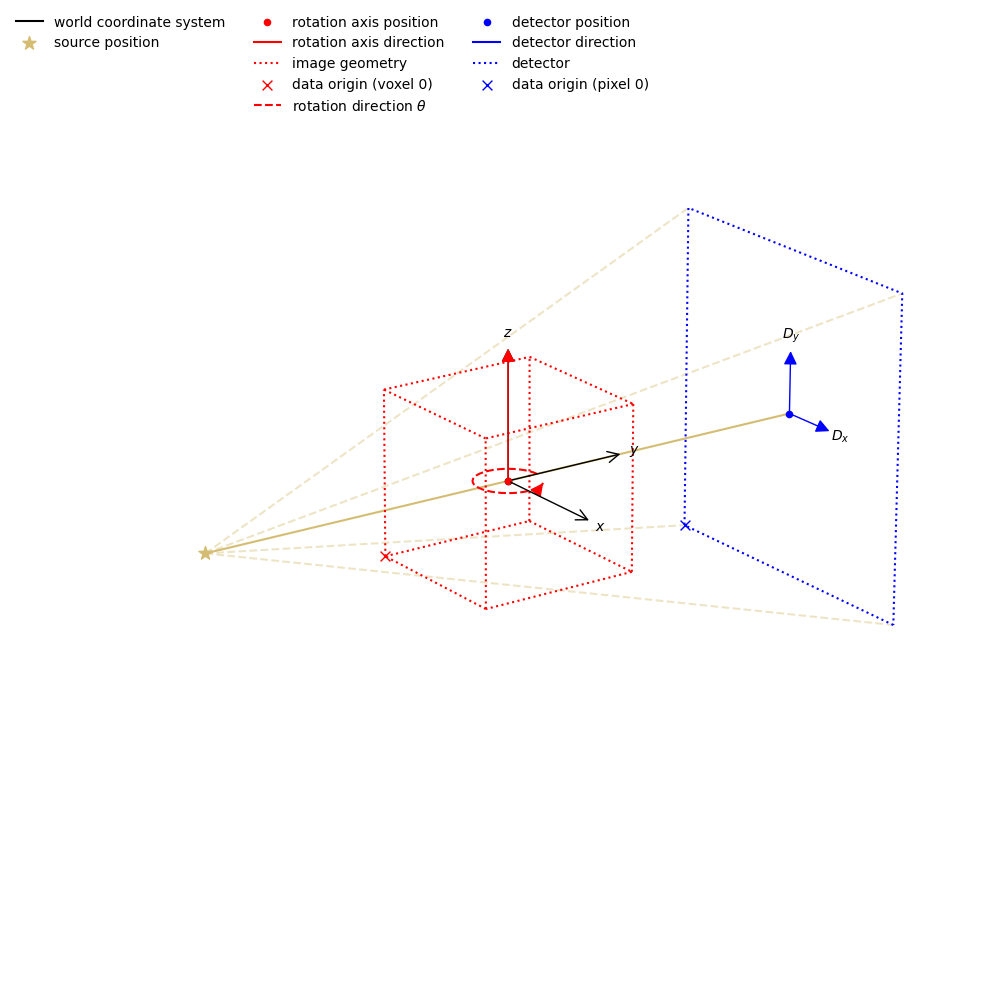

In [5]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0],detector_position=[0,10,0])\
    .set_panel(num_pixels=[10,10])\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

## Create an offset AcquisitionGeometry

It is unusual to have a perfectly aligned CT system. One of the most common offsets is the rotation-axis. If this offset is described by the `AcquisitionGeometry` then it will be accounted for in the reconstruction. This saves having to pad your data to account for this.

To specify the offset, you could either add an x-component to the `source_position` and `detector_position` or you can offset the rotation axis from the origin using `rotation_axis_position`.

As with the `source_position` and `detector_position` this is the `rotation_axis_position` is specified in 2D with a 2D vector `[X,Y]` or 3D with a 3D vector `[X,Y,Z]`

Below we offset the rotation axis by -0.5 in X by setting `rotation_axis_position=[-0.5,0]`. You can see the rotation axis position is no longer a point on the source-to-detector vector.

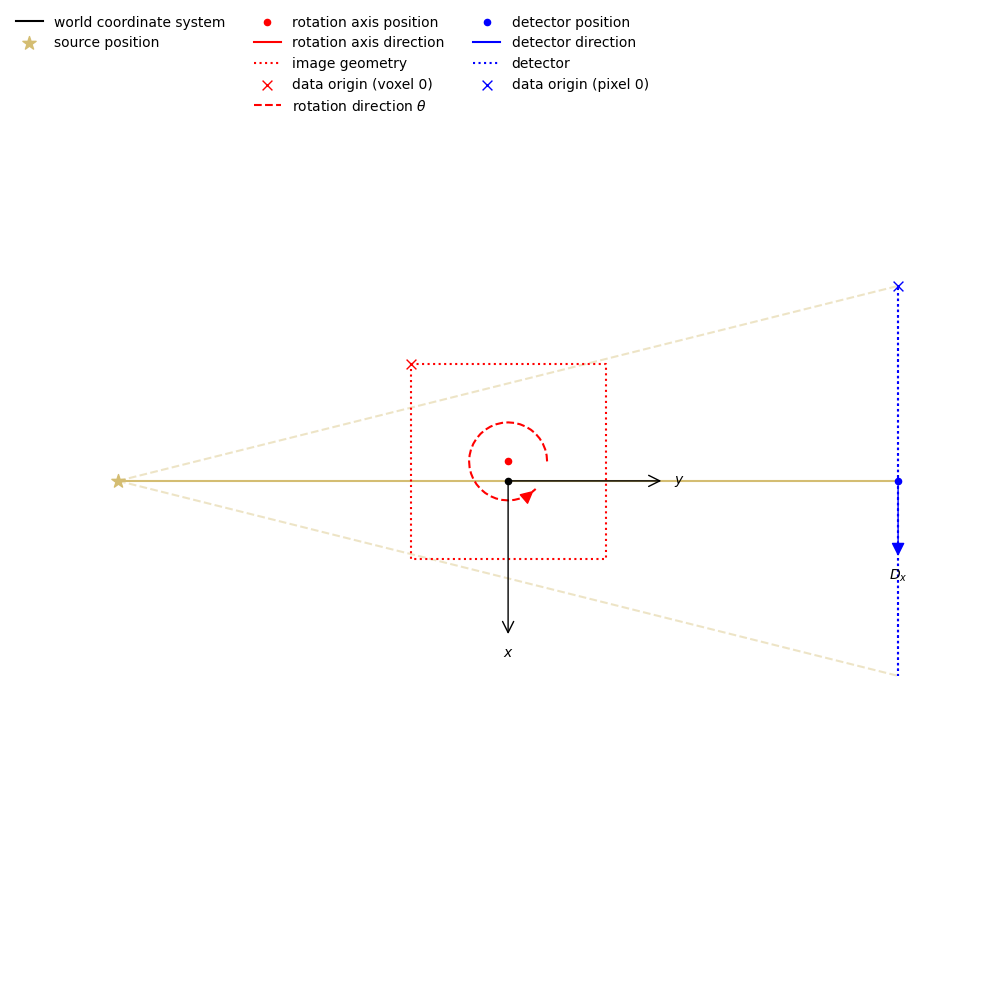

In [6]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10],
                                       rotation_axis_position=[-0.5,0])\
    .set_panel(num_pixels=10)\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

## Create a more complex AcquisitionGeometry

We can also set up rotations in the system. These are configured with vectors describing the direction.

For example a detector yaw can be described by using `detector_direction_x=[X,Y]`.


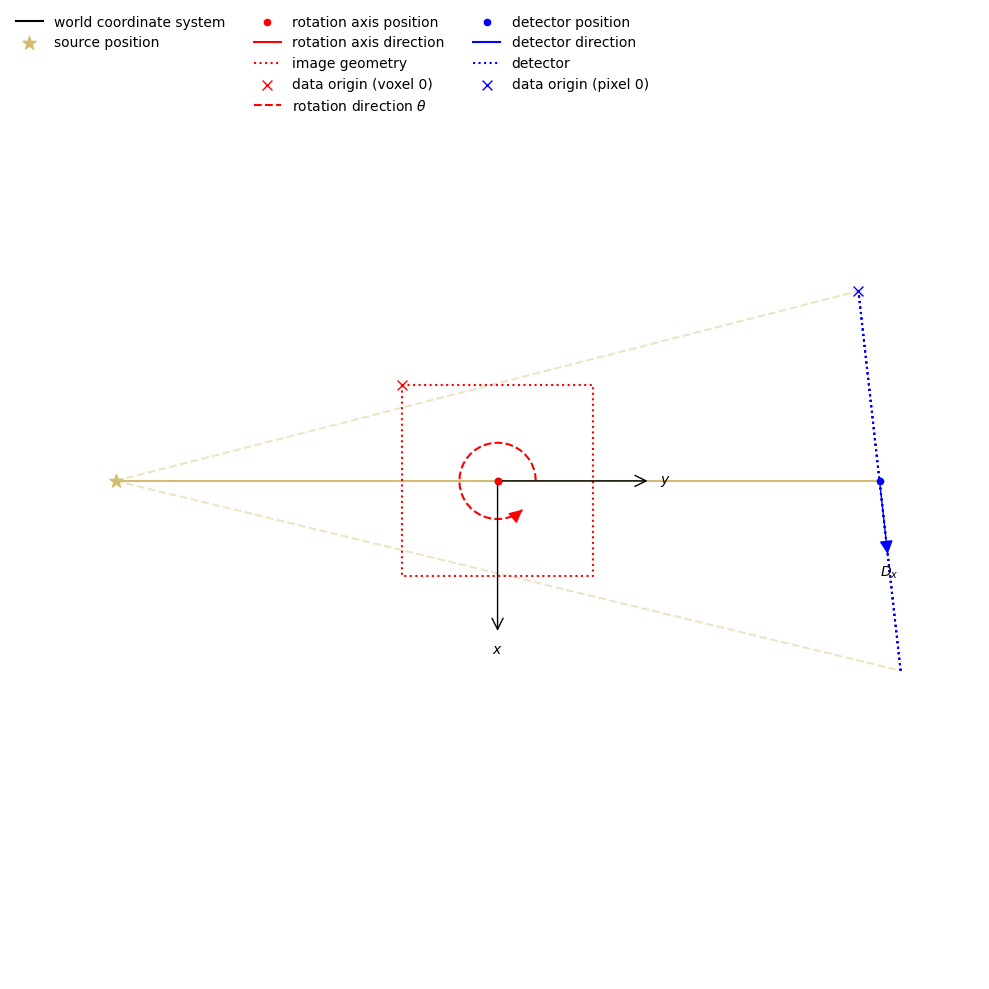

In [7]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10],
                                       detector_direction_x=[0.9,0.1]
                                       )\
     .set_panel(num_pixels=10)\
     .set_angles(angles=range(0,180))
     
show_geometry(ag)

You can set `rotation_axis_direction`, `detector_direction_x` and `detector_direction_y` by specifying a 3D directional vector `[X,Y,Z]`.

For 3D datasets detector roll is commonly corrected with a dual-slice centre of rotation algorithm. You can specify `detector_direction_x` and `detector_direction_y` - ensuring they are ortogonal vectors.

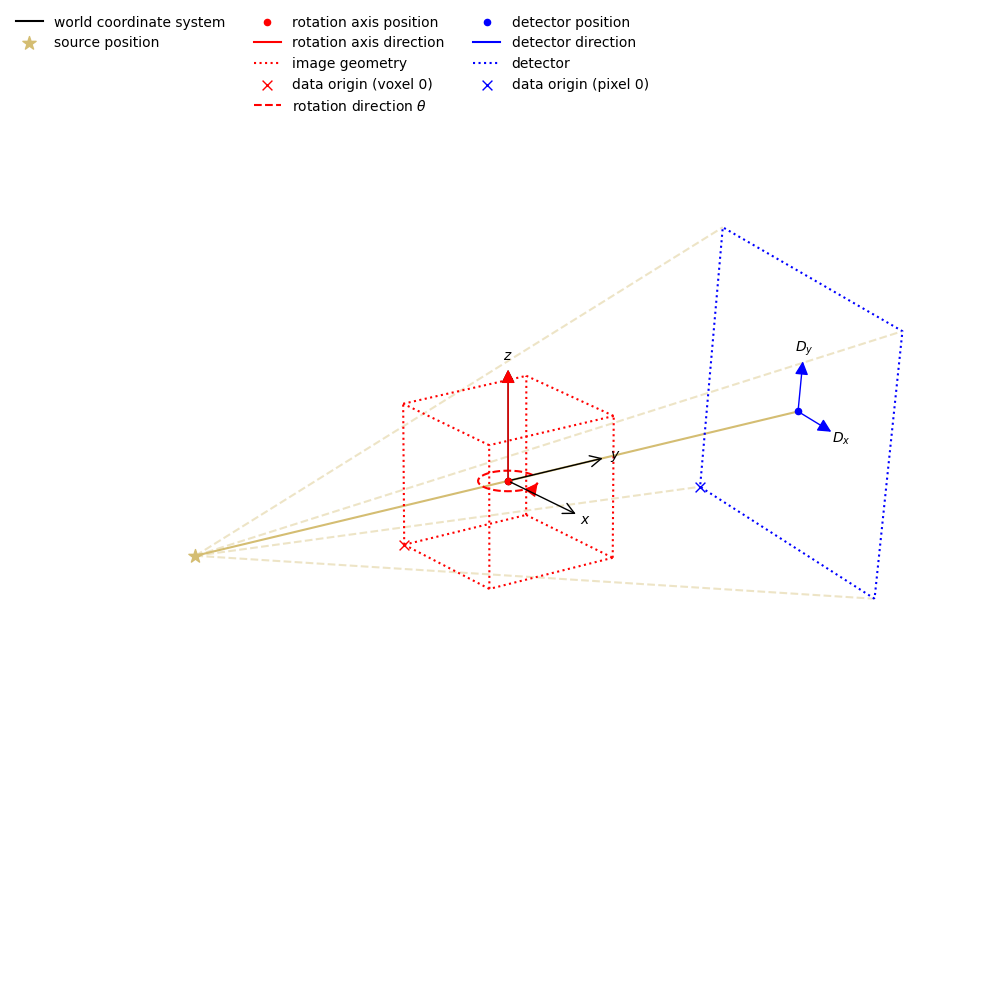

In [8]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-500,0],detector_position=[0,500,0],
                                       detector_direction_x=[0.9,0.0,-0.1],detector_direction_y=[0.1,0,0.9]
                                      )\
    .set_panel(num_pixels=[2048,2048], pixel_size = 0.2)\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

In 3D datasets we can tilt the rotation axis to describe laminograpy geometry by changing `rotation_axis_direction`

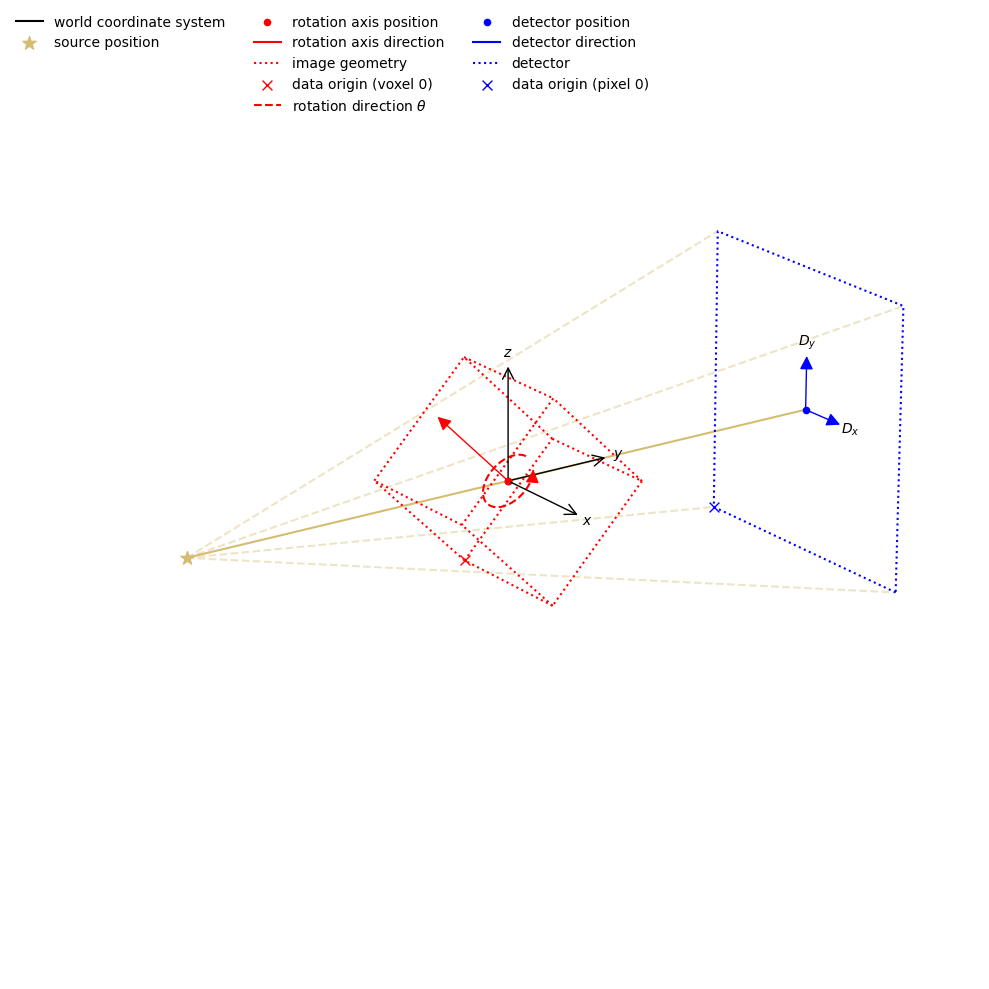

In [9]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-500,0],detector_position=[0,500,0],rotation_axis_direction=[0,-1,1])\
    .set_panel(num_pixels=[2048,2048], pixel_size = 0.2)\
    .set_angles(angles=range(0,180))
    
show_geometry(ag)

## The structure of an ImageGeometry

ImageGeometry holds the description of the reconstruction volume. It holds:

 - The number of voxels in X, Y, Z: `voxel_num_x`, `voxel_num_y`, `voxel_num_z`
 - The size of voxels in X, Y, Z: `voxel_size_x`, `voxel_size_y`, `voxel_size_z`
 - The offset of the volume from the rotation axis in voxels: `center_x`, `center_y`, `center_z`
 - The number of channels for multi-channel data

You will also need to describe the order your data is stored in using the relevent labels from the CIL. The default labels are: `channel`, `vertical`, `horizontal_y` and `horizontal_x`
 - `ig.set_labels(['vertical','horizontal_y','horizontal_x'])`

## Create a simple ImageGeometry

To create a default ImageGeometry you can use:
 `ig = ag.get_ImageGeometry()`

This creates an ImageGeometry with:
 - `voxel_num_x`, `voxel_num_y` equal to the number of horizontal pixels of the panel
 - `voxel_num_z` equal to the number of vertical pixels of the panel
 - `voxel_size_x`, `voxel_size_y` is given by the horizontal pixel size divided by magnification
 - `voxel_size_z` is given by the vertical pixel size divided by magnification


 You can pass a resolution argument:
 `ig = ag.get_ImageGeometry(resolution)` 

 - `resolution=0.5` double the size of your voxels, and half the number of voxels in each dimension
 - `resolution=2` half the size of your voxels, and double the number of voxels in each dimension

### A Note on CIL ImageGeometry:
At 0 degrees `horizontal_y` is aligned with the Y axis, and `horizontal_x` with the X axis.

In [10]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-500,0],detector_position=[0,500,0])\
    .set_panel(num_pixels=[2048,2048], pixel_size = 0.2)\
    .set_angles(angles=range(0,180))

print("ImageGeometry - default")
ig = ag.get_ImageGeometry()
print(ig)

print("ImageGeometry - 0.5x resolution")
ig = ag.get_ImageGeometry(resolution=0.5)
print(ig)

print("ImageGeometry - 2x resolution")
ig = ag.get_ImageGeometry(resolution=2)
print(ig)


ImageGeometry - default
Number of channels: 1
channel_spacing: 1.0
voxel_num : x2048,y2048,z2048
voxel_size : x0.1,y0.1,z0.1
center : x0,y0,z0

ImageGeometry - 0.5x resolution
Number of channels: 1
channel_spacing: 1.0
voxel_num : x1024,y1024,z1024
voxel_size : x0.2,y0.2,z0.2
center : x0,y0,z0

ImageGeometry - 2x resolution
Number of channels: 1
channel_spacing: 1.0
voxel_num : x4096,y4096,z4096
voxel_size : x0.05,y0.05,z0.05
center : x0,y0,z0



## Create a custom ImageGeometry
You can create your own ImageGeometry with:
`ig = ImageGeometry(...)`

Giving you full control over the parameters.

You can also change the members directly to reduce the reconstructed volume to exclude empty space.

Using the previous example, we now can specify a smaller region of interest to reconstruct. We can offset the region of interest from the origin by specifiying the physical distance.

ImageGeometry - default


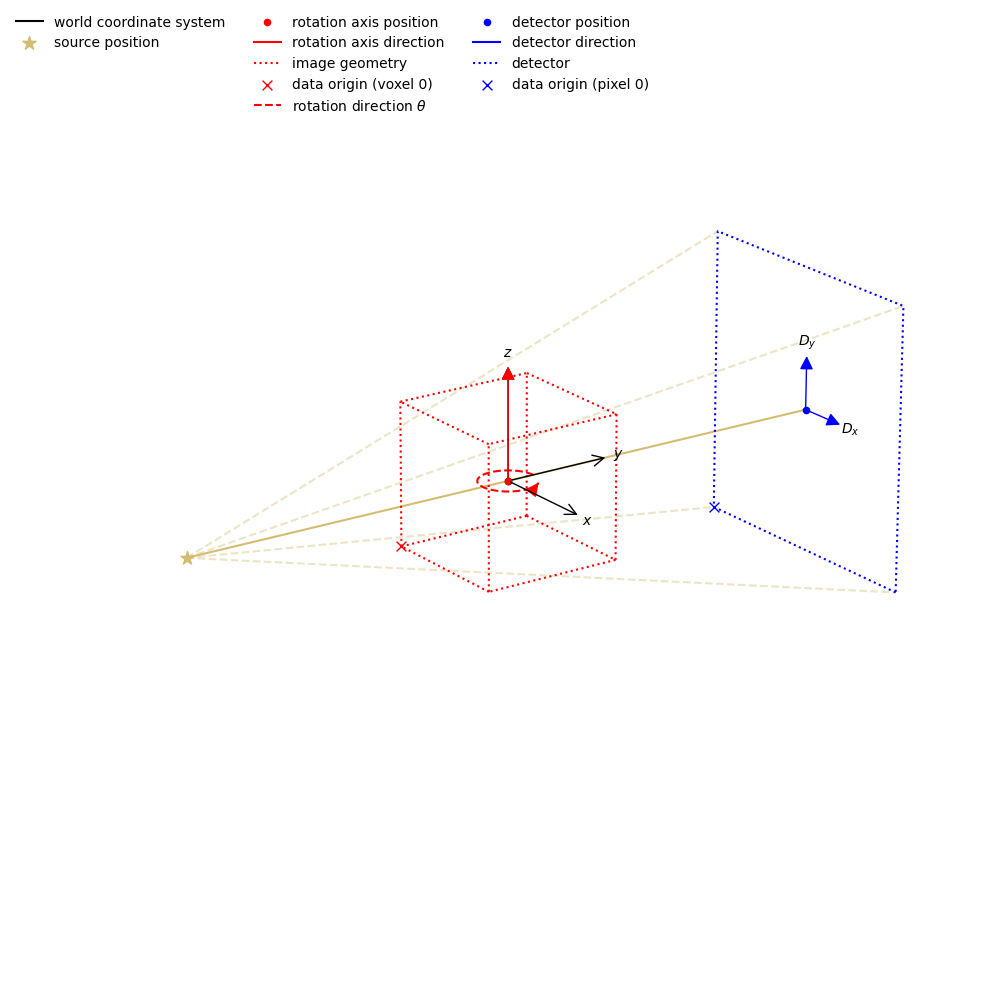

ImageGeometry - RoI


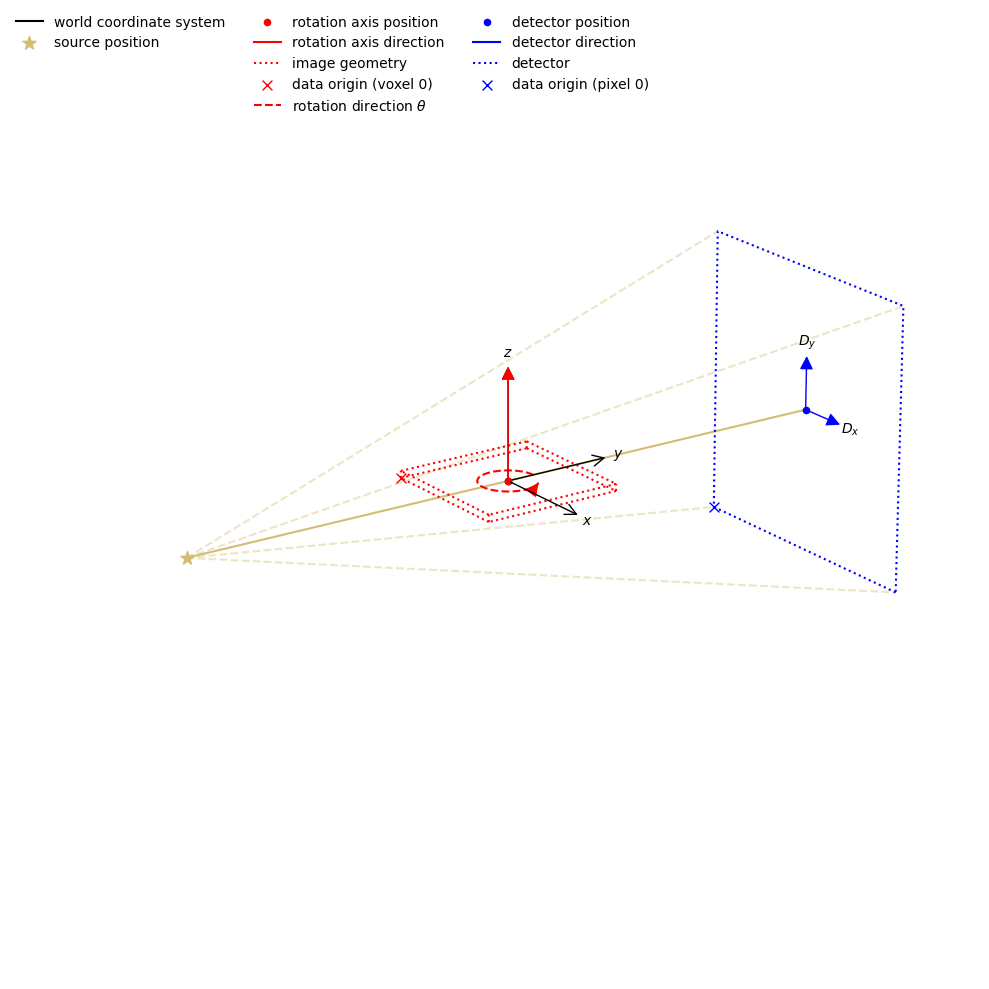

ImageGeometry - Offset RoI


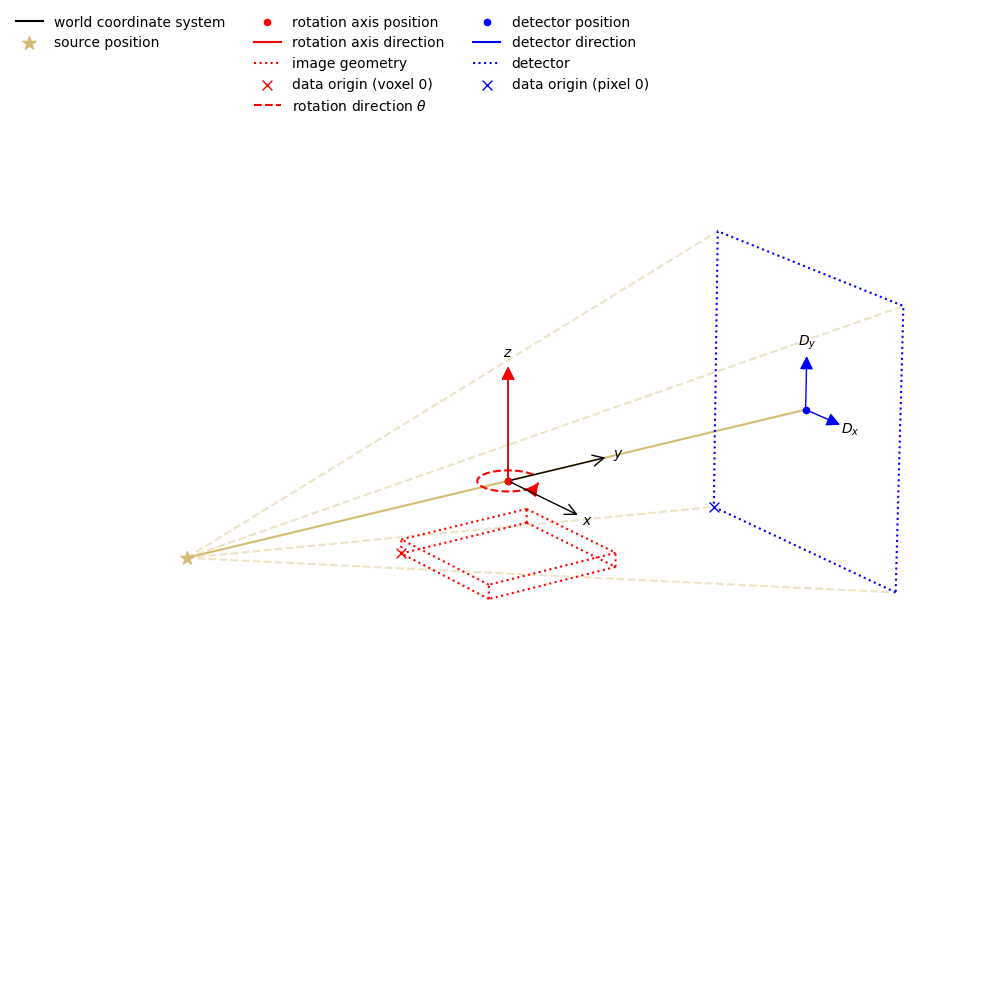

In [11]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-500,0],detector_position=[0,500,0])\
    .set_panel(num_pixels=[2048,2048], pixel_size = 0.2)\
    .set_angles(angles=range(0,180))

print("ImageGeometry - default")
ig = ag.get_ImageGeometry()
show_geometry(ag, ig)

print("ImageGeometry - RoI")
ig = ag.get_ImageGeometry()
ig.voxel_num_z = 100
show_geometry(ag, ig)

print("ImageGeometry - Offset RoI")
ig = ag.get_ImageGeometry()
ig.voxel_num_z = 200
ig.center_z = -1024 * ig.voxel_size_z
show_geometry(ag, ig)


We can also create an `ImageGeometry` directly.

Here we create our ig independently of an `AcquisitionGeometry`, by first importing `ImageGeometry` from `cil.framework`


In [12]:
from cil.framework import ImageGeometry

ig = ImageGeometry(voxel_num_x=1000, voxel_num_y=1000, voxel_num_z=500, voxel_size_x=0.1, voxel_size_y=0.1, voxel_size_z=0.2 )